# 1) Air Quality Index Prediction

The Air Quality Index (AQI) is used for reporting daily air quality. It tells you how clean or polluted your air.
The dataset contains air quality data and AQI (Air Quality Index)at hourly and daily level of Amaravati citiy in India.

## Objectives

- To build and train a model using machine learning algorithm & find out most accurate model to predict the AQI.
- AQI analysing the change in air quality.

## Attribute Information

PM2.5 :- Concentration of particulate matter less than 2.5 micrometers in diameter.

PM10 :- Concentration of particulate matter less than 10 micrometers in diameter.

NO :- Concentration of nitric oxide.

NO2 :- Concentration of nitrogen dioxide.

NOx :- Total concentration of nitrogen oxides (NO + NO2).

NH3 :- Concentration of ammonia

CO :- Concentration of carbon monoxide.

SO2 :- Concentration of sulfur dioxide.

O3 :-  Concentration of ozone.

Benzene :- Concentration of benzene.

Toluene: Concentration of toluene.

Xylene: Concentration of xylene.

AQI :- Air Quality Index value.


# 2) Loading the data and basic inference

## Importing importent libraries for EDA and Visualization

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("Machine learning air quality project.xlsx")

In [6]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Amaravati,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


# Data Preprocessing

In [7]:
#returns description of the data in the DataFrame
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1536,1513.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1467.000000,1505.000000,1518.000000,1478.000000,1478.000000,1139.000000,1411.000000
mean,2019-01-02 05:01:52.500000,38.655426,79.537602,4.780837,24.121693,16.702365,12.012484,0.635842,13.997561,38.236126,0.581123,1.843166,0.944513,99.715096
min,2017-11-24 00:00:00,4.650000,7.800000,0.250000,1.520000,0.860000,0.300000,0.000000,2.900000,7.510000,0.000000,0.000000,0.010000,24.000000
25%,2018-06-04 00:00:00,17.250000,42.610000,2.220000,10.175000,7.920000,7.170000,0.440000,9.330000,24.840000,0.060000,0.150000,0.100000,58.000000
50%,2018-12-13 00:00:00,28.390000,68.935000,3.630000,16.880000,11.995000,11.330000,0.590000,12.600000,32.370000,0.110000,0.905000,0.120000,83.000000
75%,2019-06-23 00:00:00,54.240000,111.100000,5.560000,27.547500,20.472500,16.770000,0.810000,16.810000,44.920000,0.270000,2.447500,0.180000,121.000000
max,2020-07-01 00:00:00,139.380000,230.270000,43.760000,140.170000,103.490000,35.200000,1.840000,66.390000,138.180000,53.890000,76.320000,137.450000,312.000000
std,NaN,28.014913,45.250132,4.368138,21.664163,13.718777,6.027496,0.340138,7.046713,20.273170,3.606582,3.673689,8.330565,57.960352


In [8]:
#Displays all information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        1536 non-null   object        
 1   Date        1536 non-null   datetime64[ns]
 2   PM2.5       1513 non-null   float64       
 3   PM10        1518 non-null   float64       
 4   NO          1518 non-null   float64       
 5   NO2         1518 non-null   float64       
 6   NOx         1518 non-null   float64       
 7   NH3         1518 non-null   float64       
 8   CO          1467 non-null   float64       
 9   SO2         1505 non-null   float64       
 10  O3          1518 non-null   float64       
 11  Benzene     1478 non-null   float64       
 12  Toluene     1478 non-null   float64       
 13  Xylene      1139 non-null   float64       
 14  AQI         1411 non-null   float64       
 15  AQI_Bucket  1411 non-null   object        
dtypes: datetime64[ns](1), fl

In [9]:
# checking shape or size of a dataset
df.shape

(1536, 16)

In [10]:
# Checking the Column name of a dataset
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [11]:
#Displays number of null values in each column
df.isnull().sum()

City            0
Date            0
PM2.5          23
PM10           18
NO             18
NO2            18
NOx            18
NH3            18
CO             69
SO2            31
O3             18
Benzene        58
Toluene        58
Xylene        397
AQI           125
AQI_Bucket    125
dtype: int64

In [12]:
df = df.drop(['AQI_Bucket'],axis=1)

In [13]:
#I have drop the City & Date column because this column are not required in this prediction.
df = df.drop(['City','Date'],axis=1)

In [14]:
# Imputing the missing N/A values using the mean of PM2.5 column
pmean=df["PM2.5"].mean()
df["PM2.5"].fillna(pmean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\3263240959.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM2.5"].fillna(pmean,inplace=True)


In [15]:
# Imputing the missing N/A values using the mean of PM10 column
pmmean=df["PM10"].mean()
df["PM10"].fillna(pmmean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\1332933109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM10"].fillna(pmmean,inplace=True)


In [16]:
# Imputing the missing N/A values using the mean of NO column
nmean=df["NO"].mean()
df["NO"].fillna(nmean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\650205604.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NO"].fillna(nmean,inplace=True)


In [17]:
# Imputing the missing N/A values using the mean of NO column
nomean=df["NO2"].mean()
df["NO2"].fillna(nomean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\1983196963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NO2"].fillna(nomean,inplace=True)


In [18]:
# Imputing the missing N/A values using the mean of NOx column
noxmean=df["NOx"].mean()
df["NOx"].fillna(noxmean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\4275676664.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NOx"].fillna(noxmean,inplace=True)


In [19]:
# Imputing the missing N/A values using the mean of NH3 column
nhmean=df["NH3"].mean()
df["NH3"].fillna(nhmean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\2235408372.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NH3"].fillna(nhmean,inplace=True)


In [20]:
# Imputing the missing N/A values using the mean of CO column
cmean=df["CO"].mean()
df["CO"].fillna(cmean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\1164749808.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CO"].fillna(cmean,inplace=True)


In [21]:
# Imputing the missing N/A values using the mean of SO2 column
smean=df["SO2"].mean()
df["SO2"].fillna(smean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\1681261754.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SO2"].fillna(smean,inplace=True)


In [22]:
# Imputing the missing N/A values using the mean of O3 column
omean=df["O3"].mean()
df["O3"].fillna(omean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\2481748367.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["O3"].fillna(omean,inplace=True)


In [23]:
# Imputing the missing N/A values using the mean of Benzene column
bmean=df["Benzene"].mean()
df["Benzene"].fillna(bmean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\3857731255.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Benzene"].fillna(bmean,inplace=True)


In [24]:
# Imputing the missing N/A values using the mean of Toluene column
tmean=df["Toluene"].mean()
df["Toluene"].fillna(tmean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\3657361371.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Toluene"].fillna(tmean,inplace=True)


In [25]:
# Imputing the missing N/A values using the mean of Xylene column
xmean=df["Xylene"].mean()
df["Xylene"].fillna(xmean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\19312426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Xylene"].fillna(xmean,inplace=True)


In [26]:
# Imputing the missing N/A values using the mean of AQI column
amean=df["AQI"].mean()
df["AQI"].fillna(amean,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_26420\1989913022.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AQI"].fillna(amean,inplace=True)


In [27]:
# there is no null value present iin the data
df.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [28]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,71.360000,115.750000,1.750000,20.650000,12.400000,12.190000,0.100000,10.760000,109.260000,0.170000,5.920000,0.100000,99.715096
1,81.400000,124.500000,1.440000,20.500000,12.080000,10.720000,0.120000,15.240000,127.090000,0.200000,6.500000,0.060000,184.000000
2,78.320000,129.060000,1.260000,26.000000,14.850000,10.280000,0.140000,26.960000,117.440000,0.220000,7.950000,0.080000,197.000000
3,88.760000,135.320000,6.600000,30.850000,21.770000,12.910000,0.110000,33.590000,111.810000,0.290000,7.630000,0.120000,198.000000
4,64.180000,104.090000,2.560000,28.070000,17.010000,11.420000,0.090000,19.000000,138.180000,0.170000,5.020000,0.070000,188.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,38.655426,79.537602,4.780837,24.121693,16.702365,12.012484,0.635842,13.997561,38.236126,0.581123,1.843166,0.944513,99.715096
1532,24.250000,52.380000,4.370000,15.260000,11.850000,10.300000,1.310000,12.160000,35.450000,0.210000,2.750000,0.710000,99.715096
1533,24.560000,47.610000,2.230000,9.160000,6.490000,14.560000,0.580000,18.900000,33.970000,0.190000,1.870000,0.520000,51.000000
1534,15.750000,34.120000,2.800000,9.340000,7.330000,12.080000,0.400000,28.320000,36.060000,0.160000,1.660000,0.170000,49.000000


### 1) Scatter plot

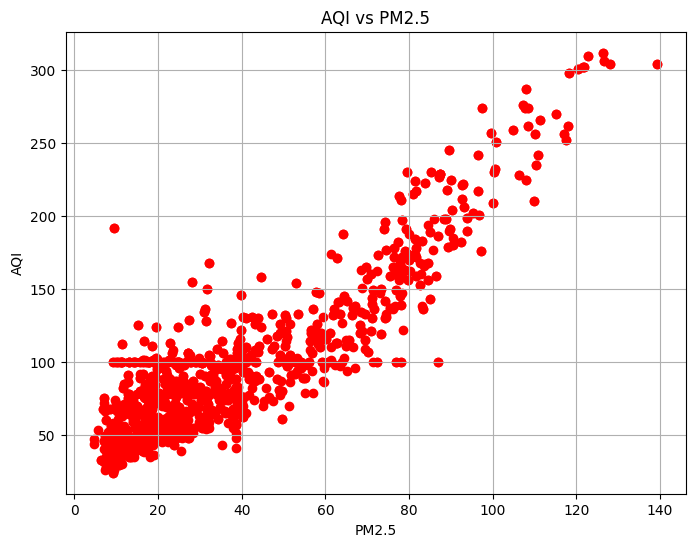

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PM2.5'], df['AQI'], color='r')
plt.title('AQI vs PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

Scatter plots are useful for relationships between AQI and other variables, such as PM2.5.

### 2) Heatmap

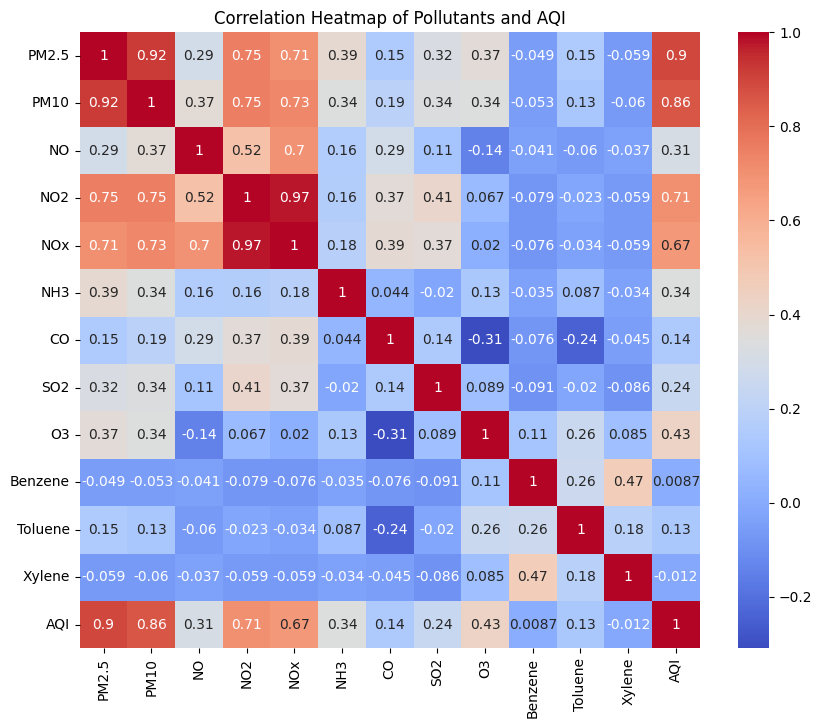

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Pollutants and AQI')
plt.show()

A heatmap is visualize the correlation between different pollutants and AQI. It provides the relationships in the data.

### 3) Histogram

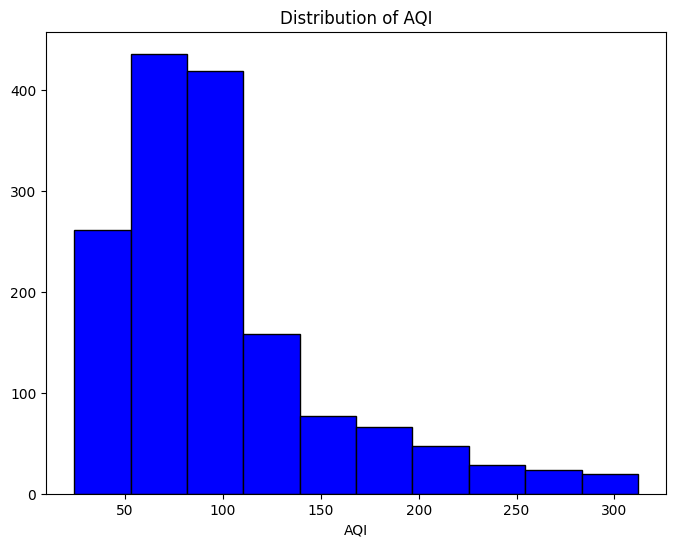

In [31]:
plt.figure(figsize=(8, 6))
plt.hist(df['AQI'], color='b', edgecolor='black')
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.show()

These plots can provide the relationships between different pollutants and air quality. They can be generated using Python libraries such as Matplotlib, Pandas.

### 4) Pairplot

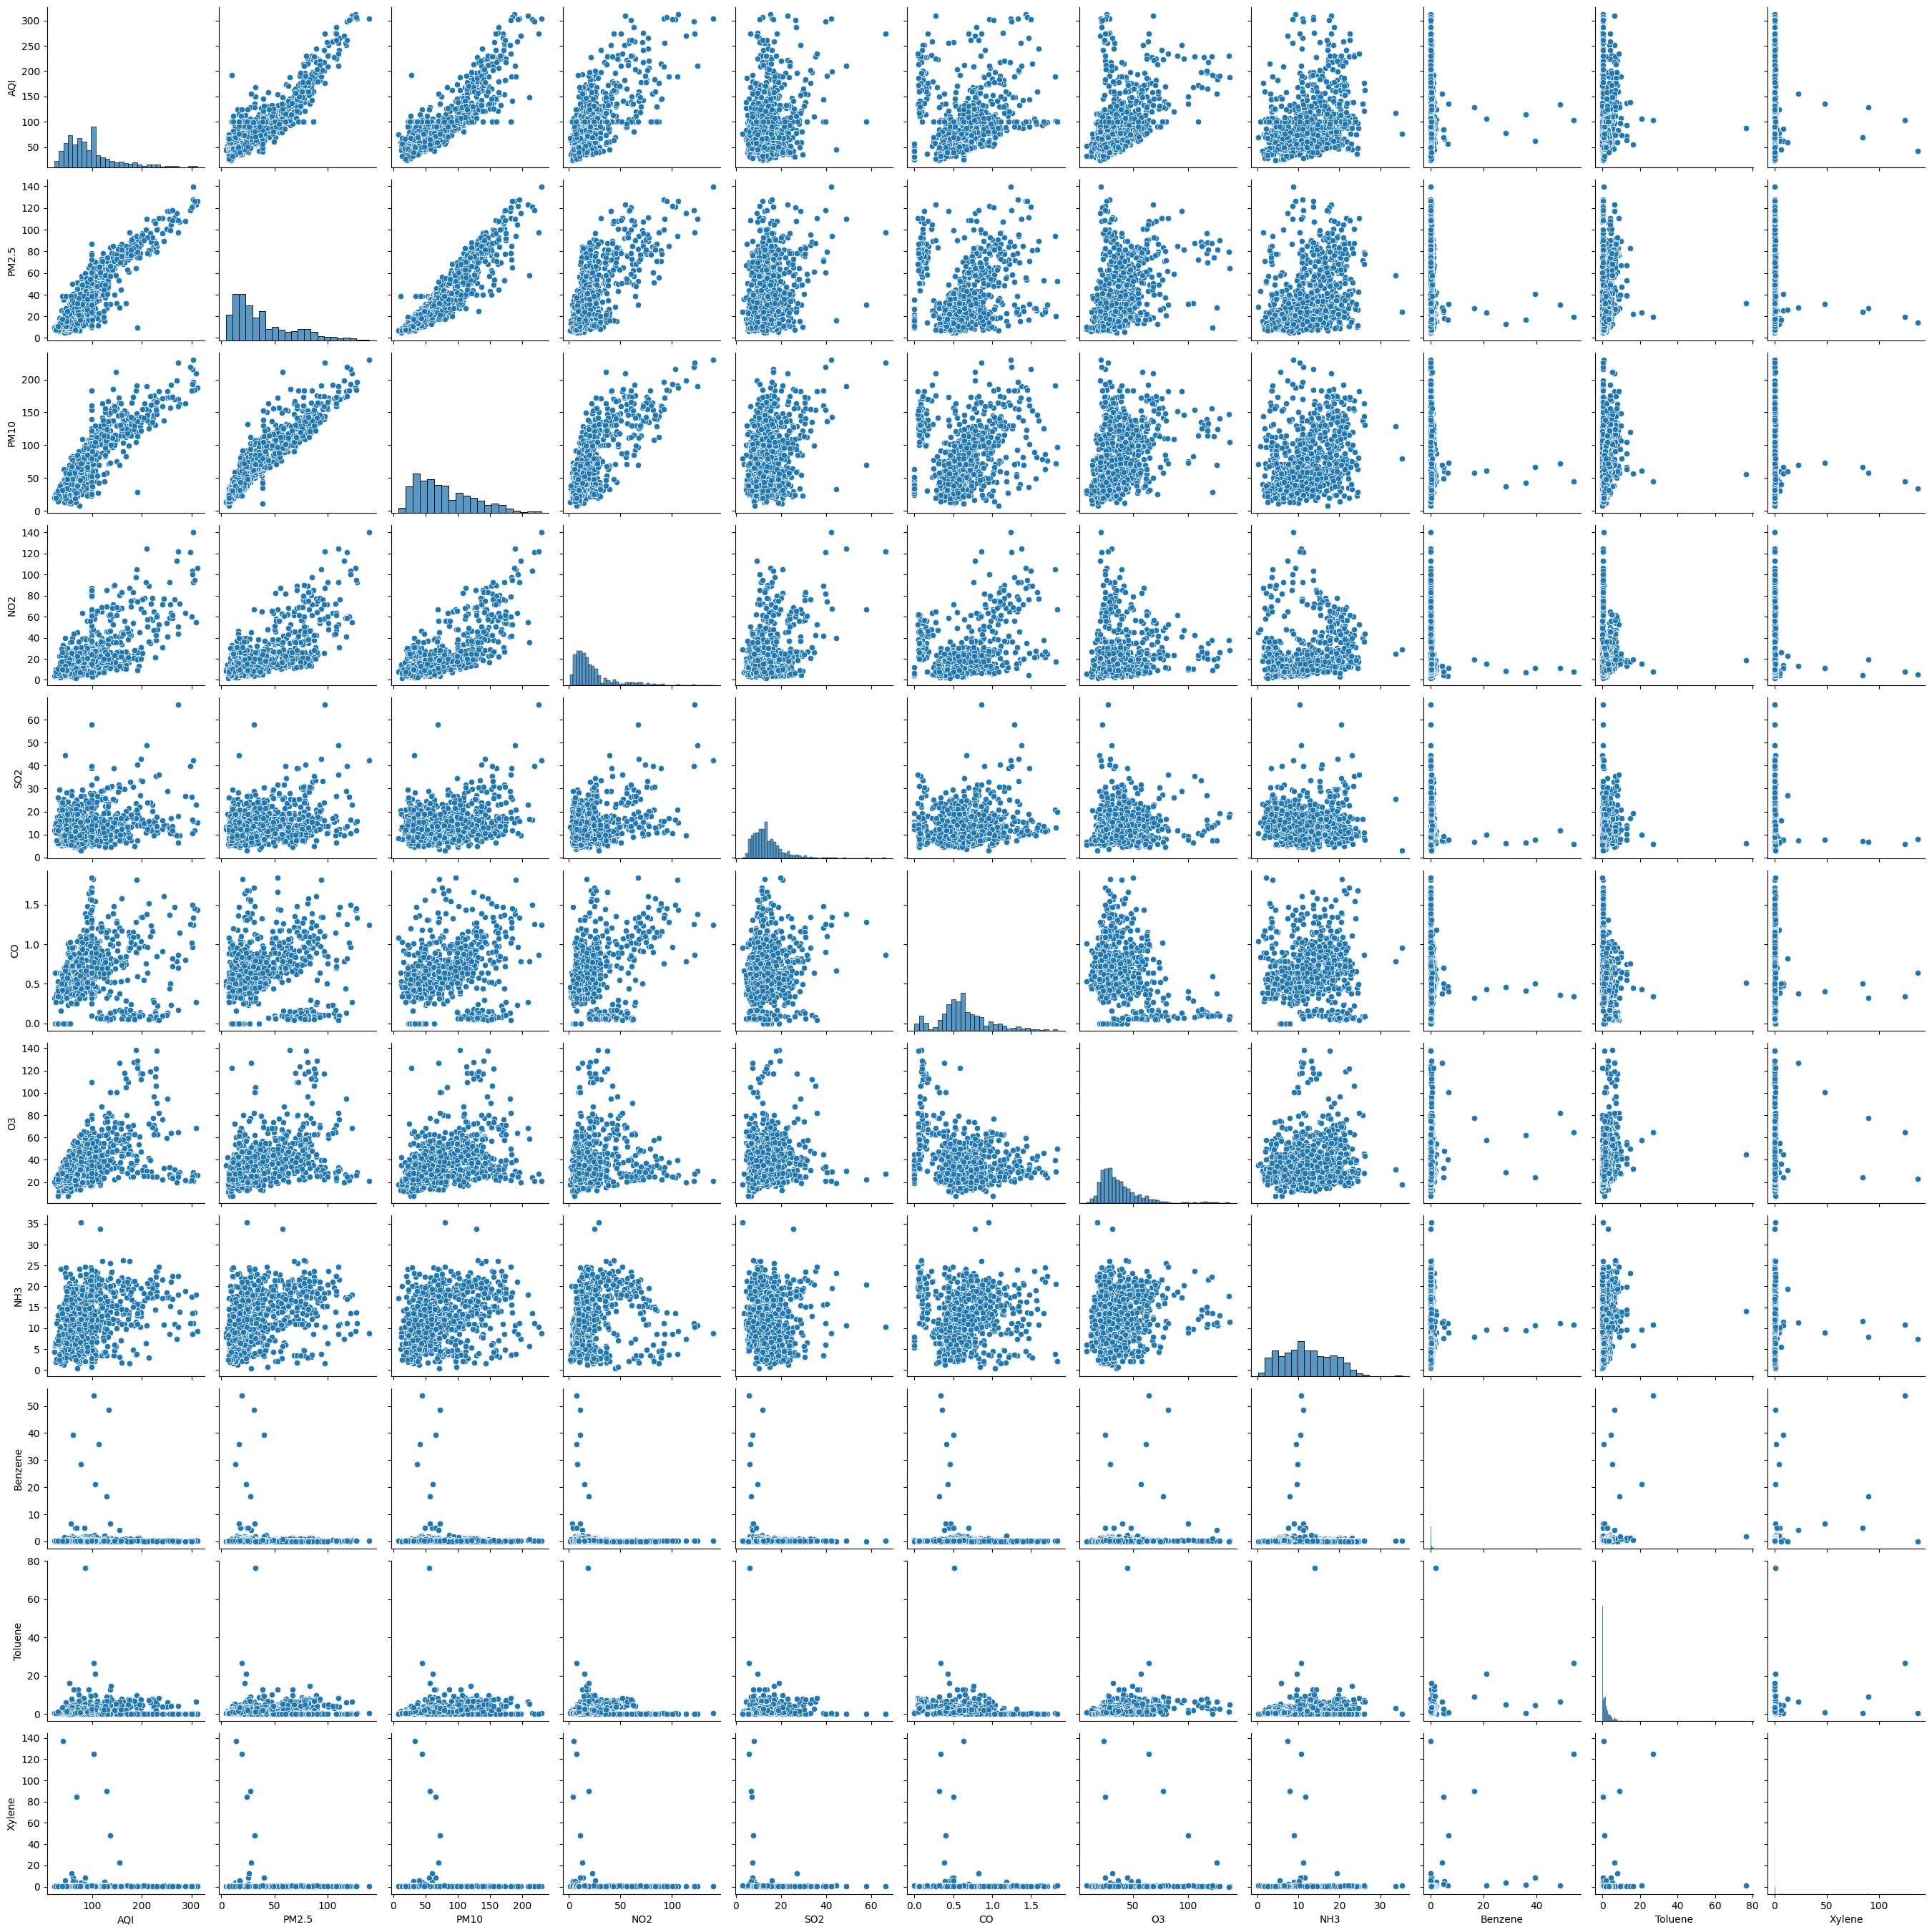

In [32]:
sns.pairplot(df[['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3', 'Benzene', 'Toluene', 'Xylene']])
plt.show()

To visualize pairwise relationships between multiple variables in the dataset, such as AQI and various pollutants.
They can be generated using Python libraries such as seaborn, Pandas.

### 5) KDE plot

C:\Users\User\AppData\Local\Temp\ipykernel_26420\2360805240.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['AQI'], shade=True, color='b')


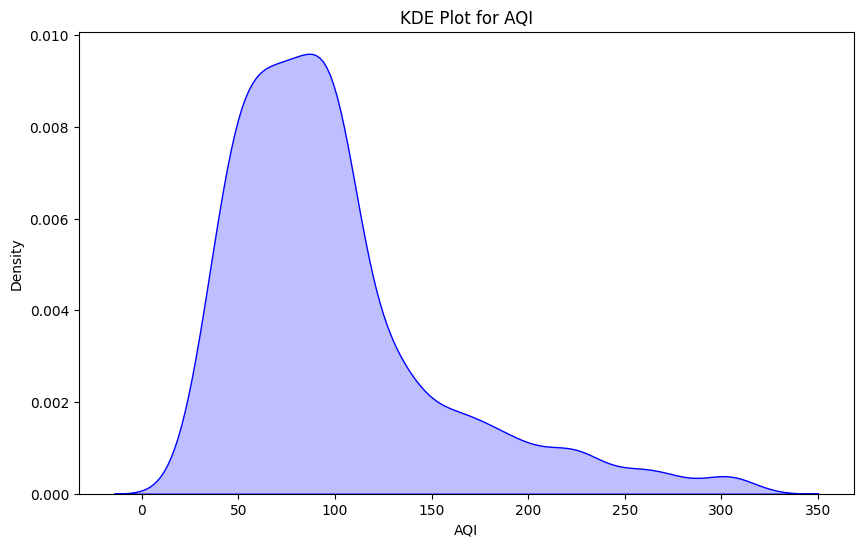

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['AQI'], shade=True, color='b')
plt.title('KDE Plot for AQI')
plt.xlabel('AQI')
plt.ylabel('Density')
plt.show()

To draw KDE (Kernel Density Estimate) plots using seaborn and matplotlib. 
KDE plots are useful for visualizing the distribution of dataset density function of the variable.
This plot is a positively skewed plot. 

In [34]:
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'NOx', 'O3', 'NH3', 'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']
x1 = df['PM2.5']
x2 = df['PM10']
x3 = df['NO']
x4 = df['NO2']
x5 = df['SO2']
x6 = df['CO']
x7 = df['NOx']
x8 = df['O3']
x9 = df['NH3']
x10 = df['Benzene']
x11 = df['Toluene']
x12 = df['Xylene']

# Multiple linear regression

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [39]:
model

LinearRegression()

In [40]:
model.fit(x_train,y_train)

LinearRegression()

In [41]:
len(x_train)

1075

In [42]:
len(y_train)

1075

In [43]:
len(x_test)

461

In [44]:
len(y_test)

461

In [45]:
a = model.coef_
a

array([ 1.23901478,  0.20406751,  1.61064919,  0.99441392, -0.59301557,
        3.52001923, -1.32843114,  0.38589868,  0.06351544,  1.04523158,
       -0.26085015, -0.00495412])

In [46]:
b = model.intercept_
b

np.float64(16.800908639682092)

In [47]:
y_pred = model.predict(x_test)
y_pred

array([ 57.0967908 , 102.10451602,  47.15536397,  62.6395672 ,
        65.26484641, 127.22795837,  90.19986782, 142.21977477,
        73.62169415,  40.33905743, 196.27495625,  84.63276773,
        96.66621932,  85.06537499,  85.50376769,  38.29916968,
       161.09849708,  52.50503549,  40.59167302,  61.44826176,
       120.49298619,  88.58881831,  90.19986782, 101.25439317,
        84.32035192, 158.70162551,  77.15302467,  93.05442902,
       141.22951067, 162.89648791,  90.62739219,  50.15365536,
       169.17766585, 146.0546775 ,  41.28623594, 204.73340397,
       100.00344134, 176.96825533, 123.33604114,  57.78820403,
       146.29979493,  52.91706899, 162.47306266,  80.94044701,
        77.73335847,  42.54737274,  73.63522957, 110.83121332,
        69.82223889,  47.92869758,  57.30412084,  61.79445488,
        51.75098318,  49.42001386,  68.40728435,  41.51816993,
        52.45066228,  49.98910134, 118.65155494, 252.87431414,
       114.58833229,  66.27686511, 162.47306266,  41.74

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score = r2_score(y_test,y_pred)

In [50]:
r2_score

0.8248727197479692

The Accuracy of multiple linear regression is 82.48%.

# SVM

In [51]:
from sklearn.svm import SVR

In [52]:
model1 = SVR(kernel='linear')

In [53]:
model1.fit(x_train,y_train)

SVR(kernel='linear')

In [54]:
y_pred1 = model1.predict(x_test)

In [55]:
from sklearn.metrics import r2_score

In [56]:
r2_score(y_test, y_pred1)

0.8203183754182591

The Accuracy of SVM is a 82.03%.

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
model2 = RandomForestRegressor()

In [59]:
model2.fit(x,y)

RandomForestRegressor()

In [60]:
model2.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
y_pred2 = model2.predict(x_test)

In [62]:
r2_score(y_test,y_pred2)

0.9415908667024934

The accuracy of random forest is a 94.15%.
Accuracy of random forest is a greater as compare to the other algorithms.
Then I have use random forest algorithm to predict the AQI value.

# KNN

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
model3 = KNeighborsRegressor()

In [65]:
model3.fit(x_train,y_train)

KNeighborsRegressor()

In [66]:
y_pred3 = model3.predict(x_test)

In [67]:
from sklearn.metrics import r2_score

In [69]:
r2_score(y_test, y_pred3)

0.8925723863476424

The accuracy of KNN is a 89.25%.

In [ ]:
import pickle

In [ ]:
with open('linear.pkl', 'wb') as file:
    pickle.dump(model2, file)
    